In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  ##

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# from warnings import filterwarnings
# filterwarnings("ignore")

##  Analysing Dataset


In [2]:
df = pd.read_csv('Aquaculture.csv',sep=',',encoding="utf-8")
df.head()

turbidity  conductivity  temperature        ph  status
0   5.975993    319.679305    27.718342  8.067010       0
1   5.746094    263.415179    26.606081  7.267479       0
2   3.627750    481.253805    25.852551  8.005779       0
3  12.338711     84.830421    20.129286  2.792018       1
4   5.551927    207.642585    25.123019  7.925818       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   turbidity     1356 non-null   float64
 1   conductivity  1356 non-null   float64
 2   temperature   1356 non-null   float64
 3   ph            1356 non-null   float64
 4   status        1356 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.1 KB


In [4]:
df

turbidity  conductivity  temperature         ph  status
0      5.975993    319.679305    27.718342   8.067010       0
1      5.746094    263.415179    26.606081   7.267479       0
2      3.627750    481.253805    25.852551   8.005779       0
3     12.338711     84.830421    20.129286   2.792018       1
4      5.551927    207.642585    25.123019   7.925818       0
...         ...           ...          ...        ...     ...
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

[1356 rows x 5 columns]

In [5]:
df.shape

(1356, 5)

In [6]:
df.isna().sum()

turbidity       0
conductivity    0
temperature     0
ph              0
status          0
dtype: int64

In [7]:
df

turbidity  conductivity  temperature         ph  status
0      5.975993    319.679305    27.718342   8.067010       0
1      5.746094    263.415179    26.606081   7.267479       0
2      3.627750    481.253805    25.852551   8.005779       0
3     12.338711     84.830421    20.129286   2.792018       1
4      5.551927    207.642585    25.123019   7.925818       0
...         ...           ...          ...        ...     ...
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

[1356 rows x 5 columns]

In [8]:
df.apply(lambda x:len(x.unique()))


turbidity       1356
conductivity    1356
temperature     1356
ph              1356
status             2
dtype: int64

(array([ 81.,  82.,  79., 125., 399., 210.,  87., 102.,  95.,  96.]),
 array([ 2.00209679,  3.3017999 ,  4.60150301,  5.90120613,  7.20090924,
         8.50061235,  9.80031546, 11.10001857, 12.39972168, 13.69942479,
        14.9991279 ]),
 <BarContainer object of 10 artists>)

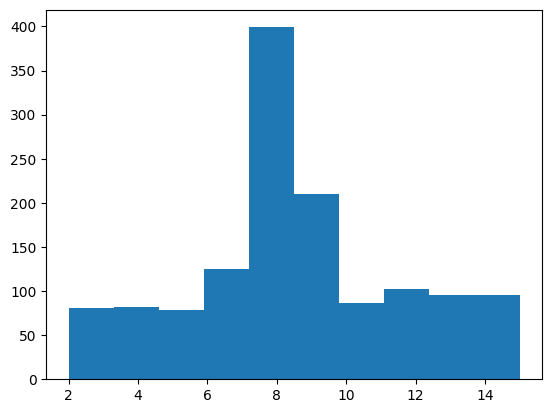

In [9]:
plt.hist(df['ph'], bins=None, range=None, density=False)

(array([175., 191., 129., 147., 120., 125., 142.,  89., 116., 122.]),
 array([1.99287431e-01, 7.52094422e+01, 1.50219597e+02, 2.25229752e+02,
        3.00239907e+02, 3.75250061e+02, 4.50260216e+02, 5.25270371e+02,
        6.00280526e+02, 6.75290681e+02, 7.50300835e+02]),
 <BarContainer object of 10 artists>)

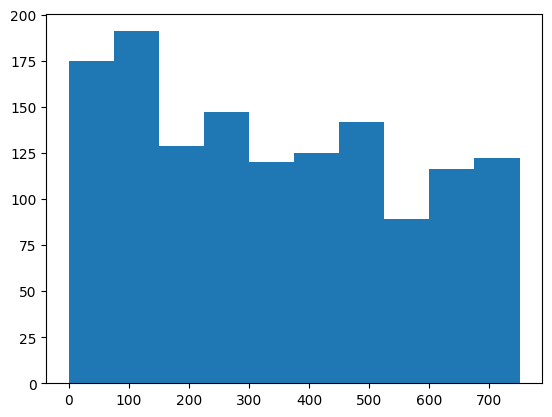

In [10]:
plt.hist(df['conductivity'], bins=None, range=None, density=False)

In [11]:
df.columns

Index(['turbidity', 'conductivity', 'temperature', 'ph', 'status'], dtype='object')

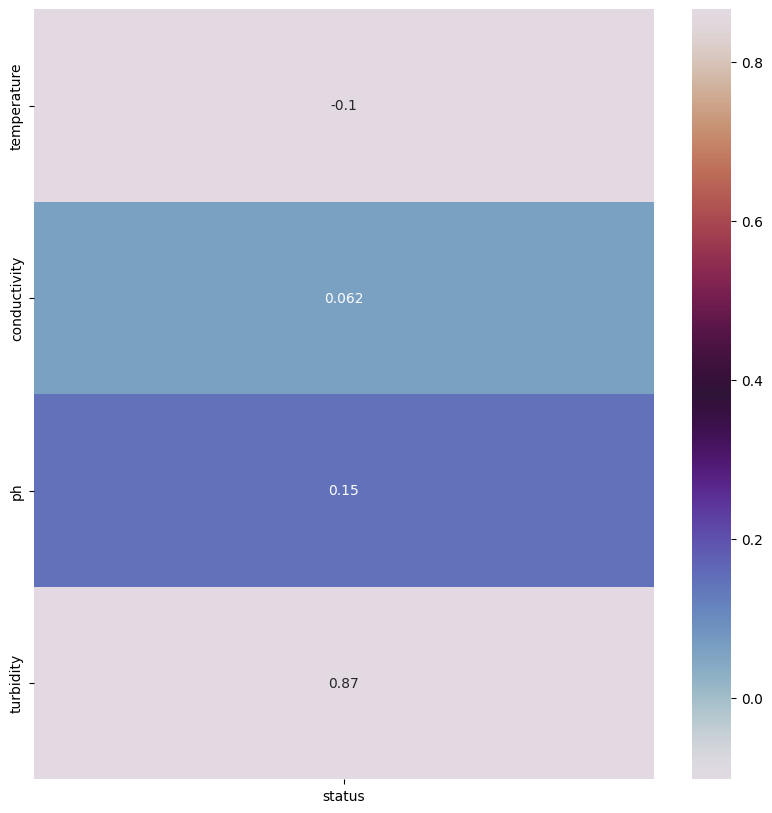

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['status']).sort_values(by='status').transpose().drop('status',axis=1).transpose(),annot=True,cmap='twilight')
plt.savefig("TargetCorrelations.png")

In [13]:
df.fillna(0)

turbidity  conductivity  temperature         ph  status
0      5.975993    319.679305    27.718342   8.067010       0
1      5.746094    263.415179    26.606081   7.267479       0
2      3.627750    481.253805    25.852551   8.005779       0
3     12.338711     84.830421    20.129286   2.792018       1
4      5.551927    207.642585    25.123019   7.925818       0
...         ...           ...          ...        ...     ...
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

[1356 rows x 5 columns]

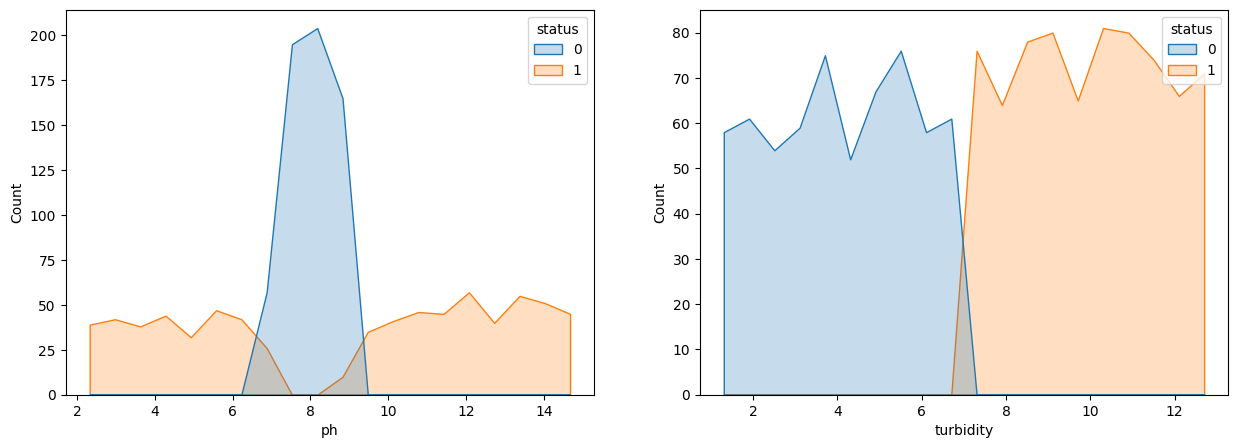

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,hue='status',x='ph',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=df,hue='status',x='turbidity',bins=20,element='poly')
plt.savefig("Resting_blood_pressure&chol_Histplot.png")

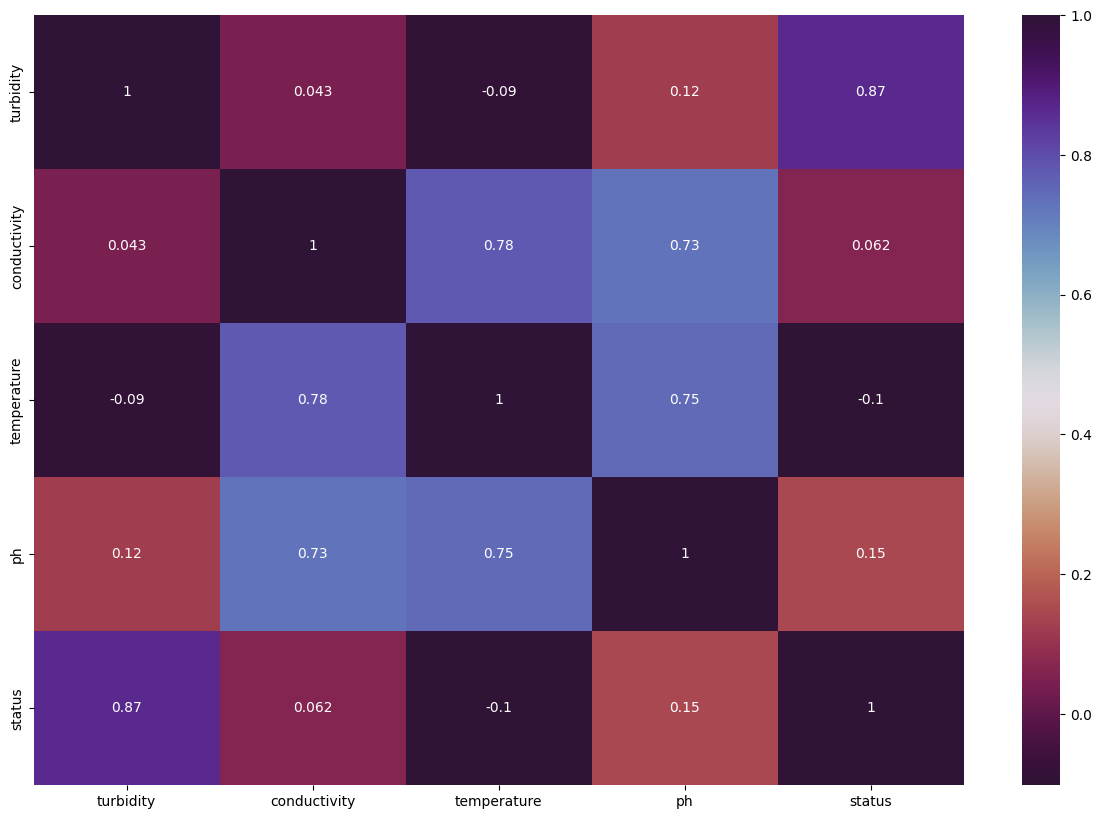

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar = True, annot =True,cmap='twilight_shifted_r'); # to check if the column is repeated
plt.savefig("heatmap.png")

In [16]:
df.columns


Index(['turbidity', 'conductivity', 'temperature', 'ph', 'status'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   turbidity     1356 non-null   float64
 1   conductivity  1356 non-null   float64
 2   temperature   1356 non-null   float64
 3   ph            1356 non-null   float64
 4   status        1356 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.1 KB


In [18]:
df.describe()

turbidity  conductivity  temperature           ph       status
count  1356.000000   1356.000000  1356.000000  1356.000000  1356.000000
mean      7.275528    340.813145    26.068755     8.504956     0.542035
std       3.419569    220.550634     4.247947     3.066970     0.498414
min       1.004350      0.199287    15.090509     2.002097     0.000000
25%       4.412805    135.969286    24.905215     7.117437     0.000000
50%       7.441419    327.388305    26.688923     8.209388     1.000000
75%      10.223459    515.295762    28.755297    10.453694     1.000000
max      12.996761    750.300835    32.977008    14.999128     1.000000

___________________________________

# Modelling
___________________________

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree





from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [20]:
X = df.drop('status',axis=1).values
Y = df['status'].values

In [21]:
df

turbidity  conductivity  temperature         ph  status
0      5.975993    319.679305    27.718342   8.067010       0
1      5.746094    263.415179    26.606081   7.267479       0
2      3.627750    481.253805    25.852551   8.005779       0
3     12.338711     84.830421    20.129286   2.792018       1
4      5.551927    207.642585    25.123019   7.925818       0
...         ...           ...          ...        ...     ...
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

[1356 rows x 5 columns]

In [22]:
X.shape

(1356, 4)

In [23]:
Y.shape

(1356,)

In [24]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1084, 4)
(272, 4)
(1084,)
(272,)


------------------------
**` 1-LogisticRegression`**
----------------------

In [26]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 

y_pred_lr = np.around(Y_pred_lr)
# print(y_pred_lr)

In [27]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,4)
score_lr

96.6912

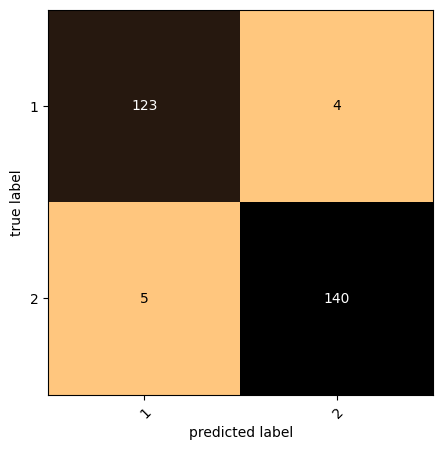

In [28]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_lr)
plot_confusion_matrix(conf_mat,class_names=["1","2"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("LRcrr.png")

In [29]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       127
           1       0.97      0.97      0.97       145

    accuracy                           0.97       272
   macro avg       0.97      0.97      0.97       272
weighted avg       0.97      0.97      0.97       272



-----------------------
**`-2- RandomForestClassifier`**
--------------------

In [30]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(272,)

In [31]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

100.0

In [32]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       145

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



In [33]:
import pickle
with open('rf.pkl', 'wb') as file:
   pickle.dump(rf,file)

-----------------------
**`-3- XGBoost `**
--------------------

In [34]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

[21:03:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




100.0

In [35]:
Y_pred_xgb = np.around(Y_pred_xgb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       145

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



-----------------------
**`-4- Showing Final Scores`**
--------------------

In [36]:
scores = [score_lr,score_rf,score_xgb]
Models = ["Logistic Regression","Random Forest","XGBoost"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 96.6912 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %


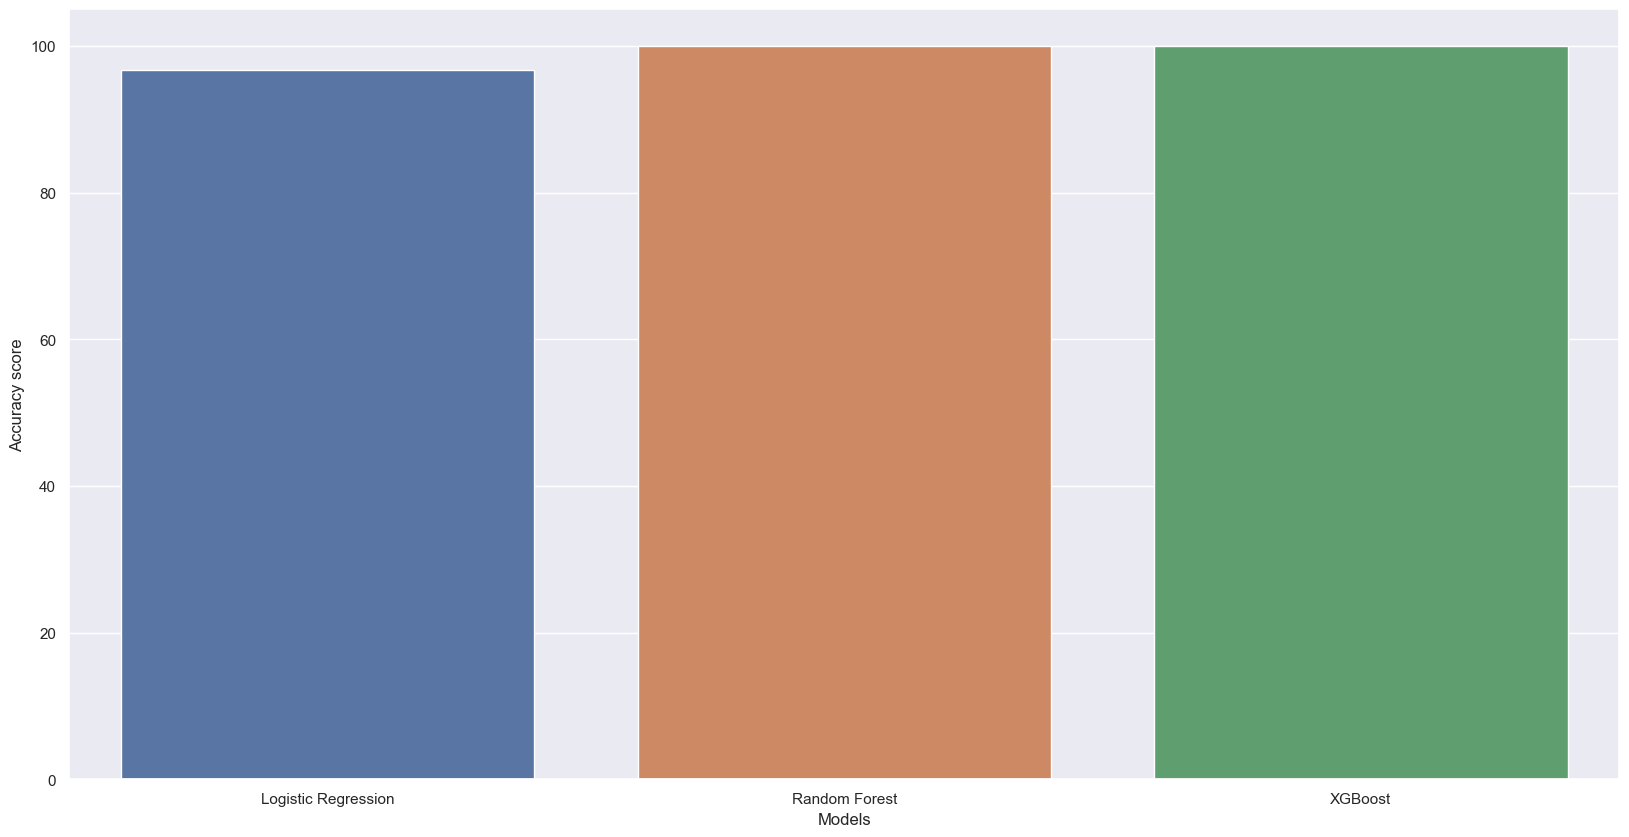

In [37]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(x=Models, y=scores)
plt.savefig("AccuracyScores.png")

In [38]:
df.describe()

turbidity  conductivity  temperature           ph       status
count  1356.000000   1356.000000  1356.000000  1356.000000  1356.000000
mean      7.275528    340.813145    26.068755     8.504956     0.542035
std       3.419569    220.550634     4.247947     3.066970     0.498414
min       1.004350      0.199287    15.090509     2.002097     0.000000
25%       4.412805    135.969286    24.905215     7.117437     0.000000
50%       7.441419    327.388305    26.688923     8.209388     1.000000
75%      10.223459    515.295762    28.755297    10.453694     1.000000
max      12.996761    750.300835    32.977008    14.999128     1.000000

In [39]:
df.head()

turbidity  conductivity  temperature        ph  status
0   5.975993    319.679305    27.718342  8.067010       0
1   5.746094    263.415179    26.606081  7.267479       0
2   3.627750    481.253805    25.852551  8.005779       0
3  12.338711     84.830421    20.129286  2.792018       1
4   5.551927    207.642585    25.123019  7.925818       0

In [40]:
df.tail()


turbidity  conductivity  temperature         ph  status
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

## Testing

In [41]:

Input = (9.144357,662.352149,30.672731,10.7076015)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = LL.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The water quality is not good')
elif(prediction[0]== 1):
  print("The water Quality is good")



[1]
The water Quality is good


In [42]:
Input = (5.975353,173.421100,27.629579,8.847105)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = LL.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The water quality is not good')
elif(prediction[0]== 1):
  print("The water Quality is good")



[0]
The water quality is not good


In [43]:
df

turbidity  conductivity  temperature         ph  status
0      5.975993    319.679305    27.718342   8.067010       0
1      5.746094    263.415179    26.606081   7.267479       0
2      3.627750    481.253805    25.852551   8.005779       0
3     12.338711     84.830421    20.129286   2.792018       1
4      5.551927    207.642585    25.123019   7.925818       0
...         ...           ...          ...        ...     ...
1351  11.719756    531.987499    30.704674  11.105487       1
1352   1.004350    323.812213    25.076759   7.440250       0
1353   5.975353    173.421100    27.629579   8.847105       0
1354   9.144357    662.352149    30.672731  10.707601       1
1355  11.196242    657.992822    30.348661  10.364200       1

[1356 rows x 5 columns]